In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [6]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


#### 2. Build the model

In [7]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b 

#### 3. Set the criterion

In [8]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b]) 

Step 0: w [0.12872458] b [0.6176918]
loss 509.2470703125

Step 1000: w [0.30753514] b [13.607094]
loss 144.31845092773438

Step 2000: w [-0.17250353] b [21.602777]
loss 78.94139862060547

Step 3000: w [-0.4693035] b [26.546377]
loss 53.94931411743164

Step 4000: w [-0.6528117] b [29.602951]
loss 44.3953742980957

Step 5000: w [-0.76627135] b [31.492773]
loss 40.7431526184082

Step 6000: w [-0.8364218] b [32.661224]
loss 39.34698486328125

Step 7000: w [-0.8797942] b [33.38365]
loss 38.81326675415039

Step 8000: w [-0.9066121] b [33.830334]
loss 38.60923767089844

Step 9000: w [-0.9231928] b [34.106506]
loss 38.53123092651367



#### 5. Visualize trained model

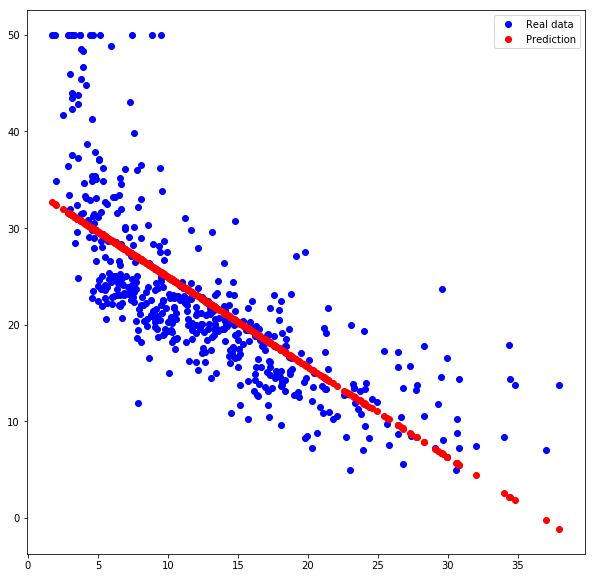

In [10]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix. Gradient Descent 단계마다 Trained model 그리기(Plotting)

In [ ]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer()) 

#     for step in range(10000):
#         sess.run(train)
#         if step % 1000 == 0:
#             print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
#             print('loss {}'.format(sess.run(loss)))
            
#             plt.figure(figsize = (10,10))
#             plt.plot(x_data, y_data, 'bo', label='Real data')
#             plt.plot(x_data, x_data * sess.run(w) + sess.run(b), 'ro', label='Prediction')
#             plt.legend()
#             plt.show()
#             print()

#     w_out, b_out = sess.run([w, b]) 